In [1]:
import random
import json
import pandas as pd
import selfies as sf
from tqdm import tqdm
from rdkit import Chem
import matplotlib.pyplot as plt

In [2]:
def make_canonical_smiles(selfies):
    canon_smiles = None
    smiles = sf.decoder(selfies)

    try:
        canon_smiles = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))
    except:
        pass  

    return canon_smiles

## Perplexities of Sas Selfies

In [3]:
gen_sas_df = pd.read_csv("data-bin-gen-sas-selfies.csv", names=["ppl", "selfies"])
gen_sas_df["smiles"] = gen_sas_df["selfies"].apply(make_canonical_smiles)
print("Lenght", len(gen_sas_df))
gen_sas_df.head()

Lenght 10240


,ppl,selfies,smiles
0,1.94,[C][C][N][Branch1][Branch2][C][C][=Branch1][C]...,CCN(CC(=O)NO)C(=O)CNCCN1C=Cc2ccc(C#N)n2N=C1
1,1.61,[C][C][N][C][Branch1][Ring1][C][C][C][C][N][Br...,CCNC1(CC)CCN(C(C)=O)C1C=C(C)c1c(CC)ncc(O)c1Cl
2,1.68,[C][C][Branch1][C][C][C][=C][N][=C][Branch1][B...,CC(C)c1cnc(-c2ccon2)o1
3,1.69,[C][C][N][C][C][C][C][C][Branch1][=Branch1][C]...,CCN1CCCCC(C(C)=O)=C1NCC(=O)c1nn2ccccc2c1C
4,1.64,[C][=C][C][C][Branch1][=Branch1][C][Branch1][C...,C=Cc1c(C(C)=O)c[nH]c1CCCCc1ccc2c(c1)C(CO)=CC2


In [4]:
non_gen_sas_df = pd.read_csv("data-bin-non-sas-selfies.csv", names=["ppl", "selfies"])
non_gen_sas_df["smiles"] = non_gen_sas_df["selfies"].apply(make_canonical_smiles)
print("Lenght", len(non_gen_sas_df))
non_gen_sas_df.head()

Lenght 10238


,ppl,selfies,smiles
0,1.70,[C][C][C][=C][Branch1][C][O][C][=C][C][=N][C][...,Cc1cc(O)c2ccnc(=O)n2c1Cc1nccc(CO)c2cnnc1-2
1,1.74,[C][C][C][N][C][=N][C][Branch1][Ring1][C][#N][...,CCCn1cnc(C#N)c1ONCCOCCc1cnc(CN)o1
2,1.61,[C][C][Branch1][C][C][C][N][C][=C][C][Branch1]...,CC(C)Cn1ccc(CCN)n1
3,1.61,[C][C][C][C][=N][C][Branch1][C][C][=C][Branch1...,CCCc1nc(C)c(C(C)(C)C)o1
4,1.71,[C][=N][O][C][=Branch1][C][=O][C][C][C][C][C][...,C=NOC(=O)CCCCCC(=O)ON=C(N)c1cccc2cnoc12


In [5]:
# Check intersection
set(gen_sas_df["smiles"].values).intersection(set(non_gen_sas_df["smiles"].values))

set()

In [7]:
train_sas_df = pd.read_csv("data-bin-train-sas-all-selfies.csv", names=["ppl", "selfies"])
len(train_sas_df)

454656

In [27]:
train_sas_df["smiles"] = train_sas_df["selfies"].apply(make_canonical_smiles)
print("Lenght", len(train_sas_df))
train_sas_df.head()

AttributeError: 'float' object has no attribute 'split'

In [ ]:
# Check intersection
len(set(train_sas_df["smiles"].values).intersection(set(non_gen_sas_df["smiles"].values)))

In [ ]:
plt.figure(figsize=(10,8))

plt.hist(train_sas_df['ppl'].values, alpha=0.5, density=False, range=[1.3,2.8], label="Train", bins=50)
plt.hist(gen_sas_df['ppl'].values[:10_000], alpha=0.5, density=False, range=[1.3,2.8], label="Generated", bins=50)
plt.hist(non_gen_sas_df['ppl'].values[:10_000], alpha=0.5, density=False, range=[1.3,2.8], label="Not Generated", bins=50)

plt.xlabel("Perplexity")
plt.ylabel("Frequency (log)")
plt.yscale("log")
plt.title("Distributions of SAS PPL [bins=50]");
plt.legend(loc='upper right')

plt.show()

In [ ]:
print(f"Generated Mean PPL {gen_sas_df['ppl'].mean():.2f}")
print(f"Not Generated Mean PPL {non_gen_sas_df['ppl'].mean():.2f}")
print(f"Train Mean PPL {train_sas_df['ppl'].mean():.2f}")

## Perplexities of Aspirin

In [12]:
gen_aspirin_df = pd.read_csv("data-bin-gen-aspirin.csv", names=["ppl", "smiles"])
print("Lenght", len(gen_aspirin_df))
gen_aspirin_df.head()

Lenght 12288


,ppl,smiles
0,1.54,COC(=O)C12CC1(O)C(=O)C(C)O2CC1=CC(O)C(=O)C1C1O...
1,1.56,C=C(C=CC=O)OC1C(=O)CC1CCC=C(CC(=O)O)C1CC1(C)OC
2,1.52,CC(C=O)=CC(C)(O)C(C=O)C=OC=C1C(=O)C2(C)OC1C2OC=O
3,1.52,C=CC1C=CC(O)C(=O)CC(=O)C1C#CC1C(O)C1C(C=O)=CCC=C
4,1.55,CC1=CCC(C2CC2C=O)OC1=OC=C(C=O)C1(C)C(=O)OC2CC21


In [13]:
non_gen_aspirin_df = pd.read_csv("data-bin-non-aspirin.csv", names=["ppl", "smiles"])
print("Lenght", len(non_gen_aspirin_df))
non_gen_aspirin_df.head()

Lenght 10240


,ppl,smiles
0,1.51,O=CC1CC2CC2(C=O)C1C(=O)OO=CC(=O)C12CC3OC(C1)C3...
1,1.63,O=CC1(O)CCOC=C1OC1CC1CC(=O)OC1C=Cc2c1coc2C
2,1.51,CC=CCCC(=O)C1C(O)C1C=OCOC12OCC3CC1C(O)(C3)C2=O
3,1.61,CC(C(N)=O)c1ccsc1OC=OO=CC1C=CCC=C1C1COC1=O
4,1.54,CC=CC1CC(O)C(C)OC1=OC=C1COC(=O)C(O)C1C(C)(C)O


In [8]:
train_aspirin_df = pd.read_csv("data-bin-train-aspirin.csv", names=["ppl", "smiles"])
print("Lenght", len(train_aspirin_df))
train_aspirin_df.head()

Lenght 12288


,ppl,smiles
0,1.61,CC(C=O)OC1CC(CO)CC1OC=c1oc(=C2COCO2)ccc1=O
1,1.54,C=C1C(C#N)OC(OC)C(=C)C1OC=C(C)C(OC)C1C(=O)CCC1O
2,1.53,CC(=CC=O)OC1C2OCC(=O)C21C=C(C)C1OC2C=CC(O2)C1=O
3,1.47,CC1(C)C(O)CC2C1C2(O)C(=O)OCC1CC1OC1C(C)C1(O)C(...
4,1.57,CC1C(=O)C2CCOC2C(C)C1OC#CC=COC(C)C1OC(C)C1=O


In [15]:
# Check intersection
set(gen_aspirin_df["smiles"].values).intersection(set(non_gen_aspirin_df["smiles"].values))

set()

In [16]:
# Check intersection
set(train_aspirin_df["smiles"].values).intersection(set(non_gen_aspirin_df["smiles"].values))

set()

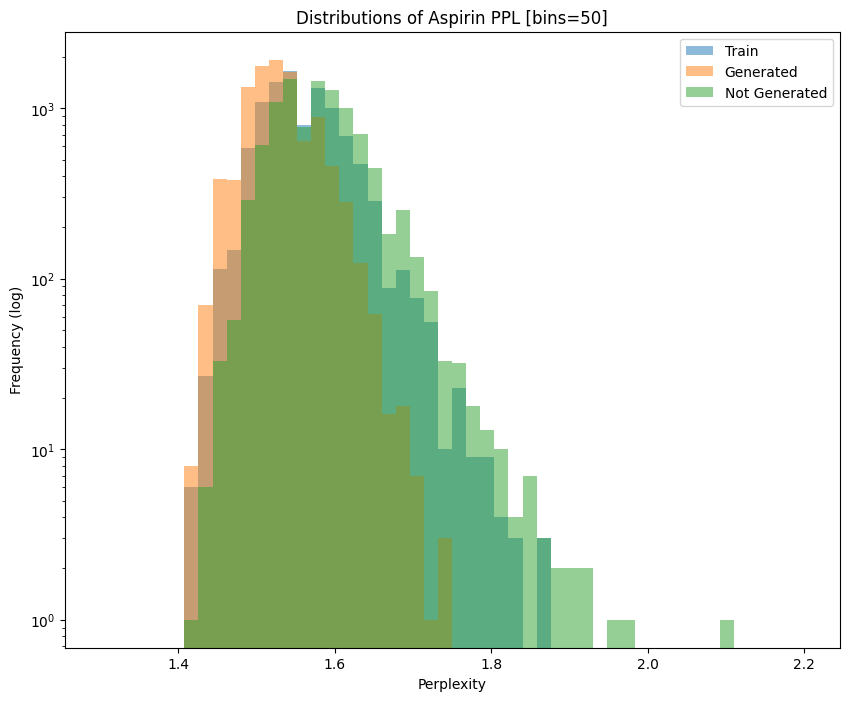

In [17]:
plt.figure(figsize=(10,8))

plt.hist(train_aspirin_df['ppl'].values[:10_000], alpha=0.5, density=False, range=[1.3,2.2], label="Train", bins=50)
plt.hist(gen_aspirin_df['ppl'].values[:10_000], alpha=0.5, density=False, range=[1.3,2.2], label="Generated", bins=50)
plt.hist(non_gen_aspirin_df['ppl'].values[:10_000], alpha=0.5, density=False, range=[1.3,2.2], label="Not Generated", bins=50)

plt.xlabel("Perplexity")
plt.ylabel("Frequency (log)")
plt.yscale("log")
plt.title("Distributions of Aspirin PPL [bins=50]");
plt.legend(loc='upper right')

plt.show()

In [18]:
print(f"Generated Mean PPL {gen_aspirin_df['ppl'].mean():.2f}")
print(f"Not Generated Mean PPL {non_gen_aspirin_df['ppl'].mean():.2f}")
print(f"Train Mean PPL {train_aspirin_df['ppl'].mean():.2f}")

Generated Mean PPL 1.53
Not Generated Mean PPL 1.58
Train Mean PPL 1.56
